<a href="https://colab.research.google.com/github/obeabi/CapstoneIBM/blob/master/Main_Planar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
## Planar Data Classification (Flower Dataset)
### 14-08-2020

In [578]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import *
%matplotlib inline

np.random.seed(1)


#from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
print('packages installed successfully!')

packages installed successfully!


In [579]:
# Load dataset and report the dimensions
X, Y = load_planar_dataset()

print(X.shape)
print(Y.shape)
print("The number of training examples is :",  str(Y.shape[1]))

(2, 400)
(1, 400)
The number of training examples is : 400


In [580]:
print(X.T)

[[ 1.20444229e+00  3.57611415e+00]
 [ 1.58709904e-01 -1.48217090e+00]
 [ 9.52471960e-02 -1.27995533e+00]
 [ 3.49178475e-01 -2.06437997e+00]
 [ 6.94150378e-01  2.88910878e+00]
 [ 1.62065038e+00 -4.03512400e+00]
 [ 1.53856225e+00  3.24255518e+00]
 [ 3.63085641e-02 -8.53952855e-01]
 [ 4.74591109e-01  2.47793820e+00]
 [ 1.65695828e-01  1.81117216e+00]
 [ 1.66446249e+00  3.45270042e+00]
 [ 8.40285720e-01 -3.44017638e+00]
 [ 2.61695163e-01  2.10549647e+00]
 [ 2.31614896e-01  1.81380501e+00]
 [ 1.58013020e+00  3.30267114e+00]
 [ 6.35509950e-03  4.18131769e-01]
 [ 6.80610419e-01  3.09636434e+00]
 [ 1.21400432e-01  1.33096004e+00]
 [ 1.13281261e+00  3.78708833e+00]
 [ 1.61505892e+00  3.67113005e+00]
 [ 1.66454441e-01  1.77614048e+00]
 [ 1.72438241e+00  2.76152023e+00]
 [ 1.88667246e+00  3.25544108e+00]
 [ 1.72327227e+00  3.46859174e+00]
 [ 1.54661332e+00  2.48644177e+00]
 [ 9.84590400e-01  3.77377130e+00]
 [ 1.45313345e+00  3.60609974e+00]
 [ 7.49043388e-01  3.11254032e+00]
 [ 1.45048341e+00  3

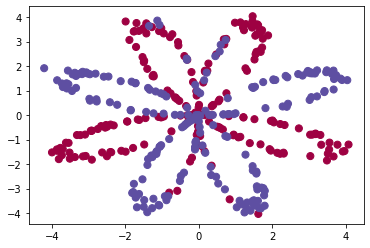

In [581]:
# plot the dataset

plt.scatter(X[0,:], X[1,:],s = 50, c = Y,cmap = plt.cm.Spectral )
plt.show()

# where - a numpy-array (matrix) X that contains features (x1, x2)
# - a numpy-array (vector) Y that contains labels (red:0, blue:1).


In [582]:
# Check for skewness in the traget variable
unique_elements, counts_elements = np.unique(Y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1]
 [200 200]]


In [583]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X.T)
print(X_train)


[[ 6.34204509e-01  1.75063021e+00]
 [ 1.02697483e-01 -7.73978408e-01]
 [ 7.04417402e-02 -6.73051874e-01]
 [ 1.99505600e-01 -1.06456109e+00]
 [ 3.74842037e-01  1.40774331e+00]
 [ 8.45747658e-01 -2.04816667e+00]
 [ 8.04025304e-01  1.58414971e+00]
 [ 4.04854173e-02 -4.60432478e-01]
 [ 2.63248195e-01  1.20252657e+00]
 [ 1.06248169e-01  8.69741193e-01]
 [ 8.68015730e-01  1.68903397e+00]
 [ 4.49117216e-01 -1.75122612e+00]
 [ 1.55041074e-01  1.01663954e+00]
 [ 1.39752389e-01  8.71055259e-01]
 [ 8.25152750e-01  1.61415380e+00]
 [ 2.52611812e-02  1.74469624e-01]
 [ 3.67960177e-01  1.51118532e+00]
 [ 8.37344609e-02  6.30065559e-01]
 [ 5.97797797e-01  1.85592820e+00]
 [ 8.42905728e-01  1.79805300e+00]
 [ 1.06633745e-01  8.52256753e-01]
 [ 8.98470808e-01  1.34406340e+00]
 [ 9.80956824e-01  1.59058110e+00]
 [ 8.97906565e-01  1.69696538e+00]
 [ 8.08117362e-01  1.20677073e+00]
 [ 5.22461938e-01  1.84928162e+00]
 [ 7.60605010e-01  1.76559613e+00]
 [ 4.02742120e-01  1.51925881e+00]
 [ 7.59258095e-01  1

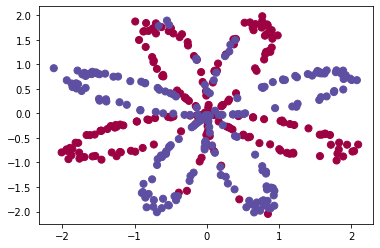

In [584]:
# plot the dataset

plt.scatter(X_train[:,0], X_train[:,1],s = 50, c = Y,cmap = plt.cm.Spectral )
plt.show()

# where - a numpy-array (matrix) X that contains features (x1, x2)
# - a numpy-array (vector) Y that contains labels (red:0, blue:1).

## Logistic Regression Model

In [585]:
from sklearn.linear_model import LogisticRegressionCV
classifier = LogisticRegressionCV(Cs=1, cv=5)
classifier.fit(X_train, Y.T)
print(classifier)

LogisticRegressionCV(Cs=1, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression


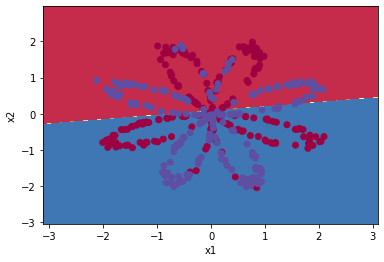

In [586]:
# Plot decision boundary
plot_decision_boundary(lambda x:  classifier.predict(sc.transform(x)), X_train.T, Y)
print('Logistic Regression')

In [587]:
# Predicting the Test set results
y_hat = classifier.predict(sc.transform(X_train))
# Predicting the Test set results
Y_train = Y.T
print(np.concatenate((y_hat.reshape(len(y_hat),1), Y_train),1))

[[0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]

In [588]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_train, y_hat)
print(cm)
print( " The accuracy score for the logistic regression model is:", str( 100*accuracy_score(Y_train, y_hat)) + "%")

[[ 83 117]
 [ 93 107]]
 The accuracy score for the logistic regression model is: 47.5%


## Two-layer Neural Network Model

In [589]:
# Load the dataset
X, Y  = load_planar_dataset()

print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


## Activation functions and derivatives

In [590]:
def Sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    ds -- derivative of sigmoid (x)
    """
    s = 1/(1+np.exp(-x))
    ds = np.multiply ( s, (1-s))
    return s, ds

In [591]:
def Tanh(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- tanh(x)
    ds -- derivative of tanh (x)
    """
    s = np.tanh(x)
    ds = 1 - np.power(s,2)
    return s, ds

In [592]:
# function : ReLu

def ReLu (Z):
  """
  Arguments --

  Z -- linear transformation : W.T X + b

  Output --

  s -- ReLu(Z)
  ds -- derivative of Relu(Z)

  """
  
  s = np.maximum(0,Z)
  ds = np.ones_like(Z)
  ds[Z<0] = 0


  return s,ds

In [593]:
Z = np.array([-0.2,0,3])
s, ds = ReLu(Z)
ds

array([0., 1., 1.])

In [594]:
# function : Leaky ReLu

def Leaky_ReLu (Z):
  """
  Arguments --

  Z -- linear transformation : W.T X + b

  Output --

  s -- LeakyReLu(Z)
  ds -- derivative of LeakyRelu(Z)

  """
  s = np.maximum(0.01* Z, Z)
  ds = np.ones_like(Z)
  ds[Z<0] = 0.01

  return s,ds

In [595]:
# function : Variable Leaky ReLu

def VariableLeaky_ReLu (Z,alpha):
  """
  Arguments --

  Z -- linear transformation : W.T X + b
  alpha -- coeffieceint of variation 

  Output --

  s -- ReLu of Z

  """
  s = np.maximum(alpha*Z, Z)
  ds = np.ones_like(Z)
  ds[Z < 0] = alpha

  return s, ds

## Find units and layers in NN

In [596]:
# function layer sizes

def layer_sizes(X,Y):
  """
  Arguments--
  X-- input dataset of shape (input size, number of examples)
  Y-- labels of shape (output size, number of examples)

  Returns
  n_x-- the size of the input layer
  n_h -- the size of the hidden layer
  n_y-- the size of the output layer

  """

  n_x = X.shape[0]
  n_h = 4
  n_y = Y.shape[0]

  return (n_x, n_h, n_y)

## Initialize Parameters

In [597]:
# Function : Initailize parameters

def initialize_parameters(n_x,n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y,n_h)* 0.01
    b2 = np.zeros((n_y,1))

    # for QC
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))

    parameters = { "W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters
    

## Forward propagation

In [598]:
# Function : Forward propagation
def forward_propagation(X, parameters):
  """
  Argument:
  X -- input data of size (n_x, m)
  parameters -- python dictionary containing your parameters (output of initialization function)
    
  Returns:
  A2 -- The sigmoid output of the second activation
  cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
  """
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  Z1 = np.dot(W1, X) + b1
  A1,dA1 = Tanh(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2,dA2 = Sigmoid(Z2)

  assert(A2.shape == (n_y, X.shape[1]))

  cache ={"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2}

  return A2, cache

## Cost function :Entropy cost function

In [599]:
# Function : compute_cost
def compute_cost(A2, Y):
  """
  Computes the cross-entropy cost given in equation (13)
    
  Arguments:
  A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
  Y -- "true" labels vector of shape (1, number of examples)
  
    
  Returns:
  cost -- cross-entropy cost given equation (13)
    
   """

  m = Y.shape[1]
  logprobs = np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1-A2) )
  cost     = - np.sum(logprobs)/ m

  cost =float(np.squeeze(cost))
  assert(isinstance (cost, float))

  return cost

In [600]:
# test funtion above
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6930587610394646


## Backward Propagation

In [601]:
# Function : Backward propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2", and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = Y.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A2 = cache["A2"]
    A1 = cache["A1"]
    Z1 = cache["Z1"]
    # Gradient for activation function in hidden layer
    a1, g1prime = Tanh(Z1)
    # Start back propation calculations
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) /m
    db2 = np.sum(dZ2, axis = 1, keepdims= True) /m
    dZ1 = np.multiply(np.dot(W2.T, dZ2) , g1prime)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m


    grads = {"dW1": dW1,
             "db1": db1,
             "dW2" : dW2,
             "db2": db2}

    return grads

## Update parameter using GD equation

In [602]:
# Function Gradient Descent
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## NN Model

In [603]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x,n_h, n_y)
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X,parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2,Y)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X,Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

## Predictions

In [604]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X,parameters)
    predictions = (A2 > 0.5)
    ### END CODE HERE ###
    
    return predictions

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219556
Cost after iteration 9000: 0.218585


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

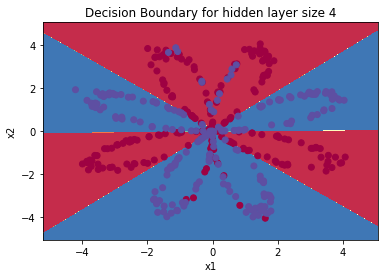

In [605]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [606]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


## Tuning hidden layer size

In [ ]:


plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.0 %
